<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/SVM_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
# SVM (Used to find the hyperplane that best separates two classes by maximizing the margin between them. This margin is the distance from the hyperplane to the nearest data points (support vectors) on each side.)
# Linear Kernel: For linear separability.
# Polynomial Kernel: Maps data into a polynomial space.
# Radial Basis Function (RBF) Kernel: Transforms data into a space based on distances between data points.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SVC(Support Vector Classifier) is a class within the svm module used for performing classification tasks using SVM algorithm.
from sklearn.svm import SVC
from sklearn import datasets

In [338]:
iris = pd.read_csv('/content/IRIS(ML - Decision Tree dataset).csv')
display(iris.head(5))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [339]:
x = iris[['petal_length', 'petal_width']]
y = iris['species']

setosa_or_versicolor = (y == 'Iris-setosa') | (y == 'Iris-versicolor')
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

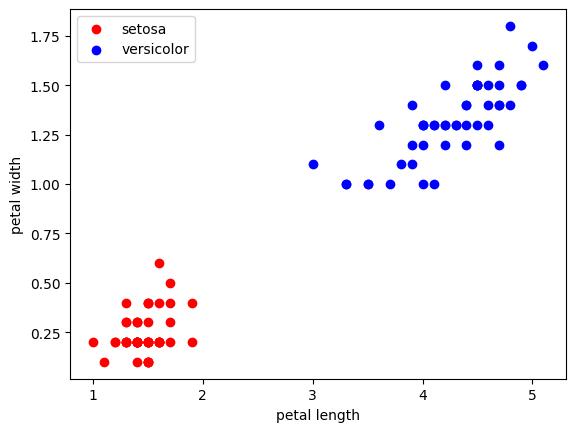

In [340]:
plt.scatter(x['petal_length'][y == 'Iris-setosa'],
            x['petal_width'][y == 'Iris-setosa'],
            color = 'red', label = 'setosa')
plt.scatter(x['petal_length'][y == 'Iris-versicolor'],
            x['petal_width'][y == 'Iris-versicolor'],
            color = 'blue', label = 'versicolor')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.show()

In [341]:
# C : regulates parameters to avoid overfitting
svm_clf = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm_clf.fit(x, y)

SVC(kernel='linear', random_state=42)

In [342]:
# represents the coefficients (or weights) of the hyperplane that separates the two classes.
svm_clf.coef_

array([[1.1, 0.7]])

In [343]:
# Below code represents the intercept (or bias) of the hyperplane, where hyperplane crosses the origin.
svm_clf.intercept_

array([-3.27999997])

In [344]:
# w = svm_clf.coef: This line access the coefficients of the SVM model and [0] used to access first row of coef_ array.
# b = svm_clf.intercept_: This line access the itercept (or bias) of the trained SVM model and [0] access the first element of the intercept_ array.
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]

  # formula => w0 * x0 + w1*x1 + b = 0, x1 = -w0/w1 - b/w1
  # np.linspace() is a NumPy function that creates an array of evenly spaced numbers over a specified interval.
  # 200 specifies the number of samples to generate.
  # w[0] is the coefficient for the first feature ('petal length') and w[1] is the coefficient for the second feature ('petal width'), b is the intercept.
  # decision_boundary is calculating the y-coordinates (x_1 values) for each x0 value using the rearranged equation of the hyperplane.
  # Below two lines generate a set of x-coordinates (x0) and then calculate the corresponding y-coordinates (decision_boundary) based on the learned SVM parameters (w and b) to define the points that form the decision boundary line.
  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]

  # Below line calculates a value that is used to determine the distance of the margin boundaries from the decision boundary in the context of plotting.
  margin = 1/w[1]

  # Below line calculates the y-coordinates for the upper boundary(glutter_up) of the margin (decision_boundary) and adds the calculated margin value to them, this create a line parallel to decision boundary.
  gutter_up = decision_boundary + margin

  # Below line calculates the y-coordinates for the lower boundary(glutter_down) of the margin (decision_boundary) and subtracts the margin value from y coordinates of the decision boundary, this shifts the decision boundary downwards by the margin amount, creating another line parallel to the decision boundary on the other side.
  gutter_down = decision_boundary - margin

  # Below line access the support vectors on the scatter plot.
  svs = svm_clf.support_vectors_

  # Below line plot the support vectors on the scatter plot.
  plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = 'green', edgecolors = 'blue', label = 'Support Vectors')

  # 'k' means black color, '-' means solid line style, '--' means dashed line style.
  plt.plot(x0, decision_boundary, 'k-', linewidth = 2)
  plt.plot(x0, gutter_up, 'k--', linewidth = 2)
  plt.plot(x0, gutter_down, 'k--', linewidth = 2)

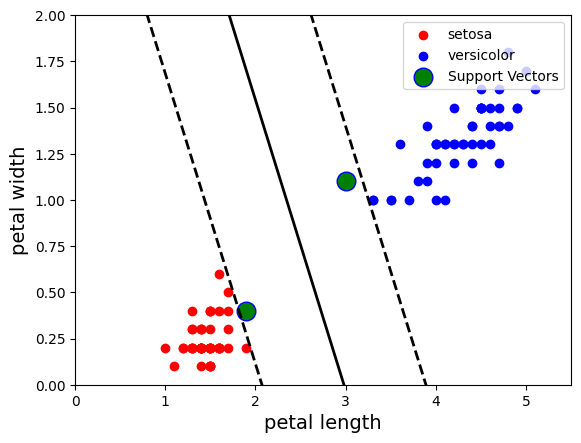

In [345]:
# Create the scatter plot
plt.scatter(x['petal_length'][y == 'Iris-setosa'],
            x['petal_width'][y == 'Iris-setosa'],
            color='red', label='setosa')
plt.scatter(x['petal_length'][y == 'Iris-versicolor'],
            x['petal_width'][y == 'Iris-versicolor'],
            color='blue', label='versicolor')

# Plot the decision boundary
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel('petal length', fontsize=14)
plt.ylabel('petal width', fontsize=14)  # Uncommented for clarity
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

In [346]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

(np.float64(0.0), np.float64(6.0), np.float64(0.0), np.float64(90.0))

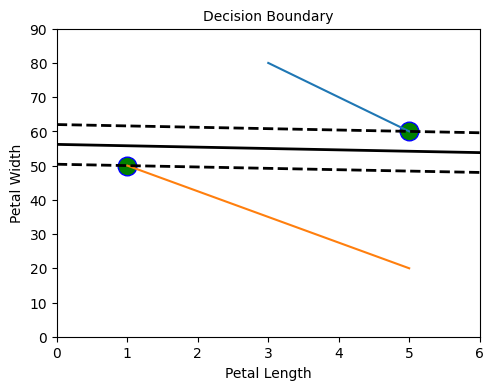

In [347]:
xs = np.array([[1,50], [5,20], [3,80], [5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel = 'linear', C = 1.0, random_state = 42)
svm_clf.fit(xs, ys)
# C : regulates parameters to avoid overfitting

plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(xs[:, 0][ys == 1], xs[:,1][ys==1])
plt.plot(xs[:, 0][ys == 0], xs[:,1][ys==0])
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)
plt.title('Decision Boundary', fontsize = 10)
plt.axis([0, 6, 0, 90])

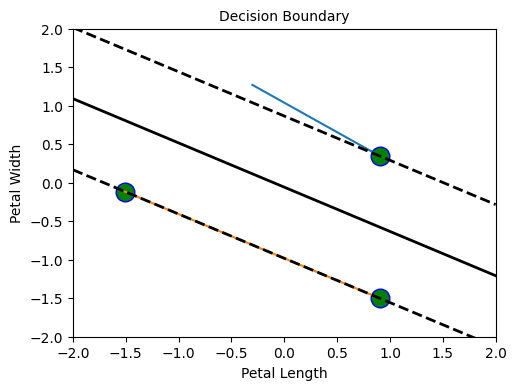

In [348]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xs)
svm_clf.fit(x_scaled, ys)

plt.figure(figsize = (12,4))
plt.subplot(122)

# x_scaled[:,0][ys == 1]: selects all the scaled values from the first feature (the first column of x_scaled) only for those data points where the original class label in ys is equal to 1.
# x_scaled[:,1][ys == 1]: selects all the scaled values from the second feature (the second column of x_scaled) only for those data points where the original class label in ys is equal to 1.
# x_scaled[:,0][ys == 0]: selects all the scaled values from the first feature (the first column of x_scaled) only for those data points where the original class label in ys is equal to 0.
# x_scaled[:,1][ys == 0]: selects all the scaled values from the second feature (the second column of x_scaled) only for those data points where the original class label in ys is equal to 0.
plt.plot(x_scaled[:,0][ys == 1], x_scaled[:,1][ys == 1])
plt.plot(x_scaled[:,0][ys == 0], x_scaled[:,1][ys == 0])
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)
plt.title('Decision Boundary', fontsize = 10)
plt.axis([-2, 2, -2, 2])
plt.show()

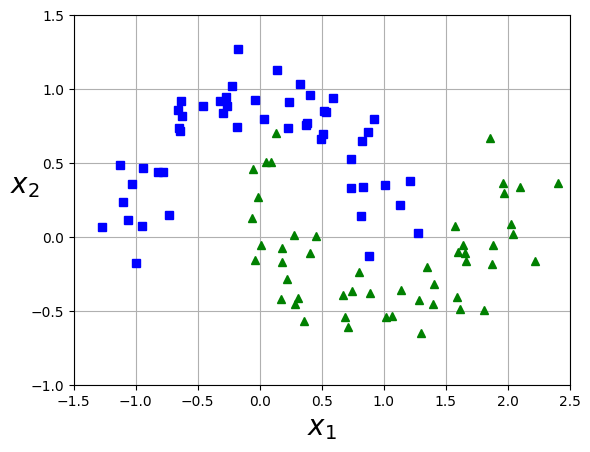

In [359]:
# make_moons: It creates a 2D dataset consisting of two interleaving half circles, or "moons".
# noise: It controls the amount of Gaussian noise added to the data points generated by make_moons
from sklearn.datasets import make_moons
x, y = make_moons(n_samples = 100, noise = 0.15, random_state = 42)

# x[:, 0][y == 0]: selects all the values from the first feature (the first column of x) only for those data points where the class label in y is equal to 0.
# x[:, 1][y == 0]: selects all the values from the second feature (the second column of x) only for those data points where the class label in y is equal to 0.
# x[:, 0][y == 1]: selects all the values from the first feature (the first column of x) only for those data points where the class label in y is equal to 1.
# x[:, 1][y == 1]: selects all the values from the second feature (the second column of x) only for those data points where the class label in y is equal to 1.
def plot_dataset(x, y, axes):
  plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], 'bs', label = 'Class 0')
  plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], 'g^', label = 'Class 1')
  plt.axis(axes)
  plt.grid(True, which = 'both')
  plt.xlabel(r'$x_1$', fontsize = 20)
  plt.ylabel(r'$x_2$', fontsize = 20, rotation = 0)
  # r'$x_1$': x-axis name as x_1, r is raw string
  # r'$x_2$': y-axis name as x_2, x is raw string
  # dollar signs ($) within the string indicate that the content inside them should be interpreted as a mathematical expression

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [360]:
xs = np.array([[1,50], [5,20], [3,80], [5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
from sklearn.pipeline import Pipeline

# Pipeline: Used to define and execute a sequence of operations for data processing and model training.
# svm_clf_pipe, SVC(kernel = 'linear', C = 100)): This step defines an SVC (Support Vector Classifier) model with a linear kernel and C is a regularization parameter to avoid overfitting and 100 is the value given to C.
svm_pipe = Pipeline([('scaler', StandardScaler()),
                     ("svm_clf_pipe", SVC(kernel = 'linear', C = 100))])
svm_pipe.fit(xs, ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_pipe', SVC(C=100, kernel='linear'))])

In [351]:
svm_pipe['svm_clf_pipe']

SVC(C=100, kernel='linear')

(np.float64(-2.0), np.float64(2.0), np.float64(-2.0), np.float64(2.0))

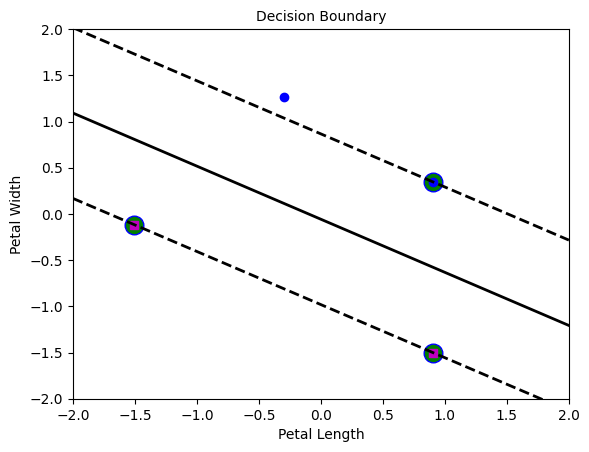

In [365]:
# x_scaled[:, 0][ys==1]: This selects all the values from the first feature (column 0) of the x_scaled array for only those rows where the value in ys is equal to 1.
# x_scaled[:, 1][ys==1]: This selects all the values from the second feature (column 1) of the x_scaled array for only those rows where the value in ys is equal to 1.
# bo: This is a format string for the plot. "b" specifies the color as blue, and "o" specifies the marker style as circles.
# x_scaled[:, 0][ys==0]: This selects all the values from the first feature (column 0) of the x_scaled array for only those rows where the value in ys is equal to 0.
# x_scaled[:, 1][ys==0]: This selects all the values from the second feature (column 1) of the x_scaled array for only those rows where the value in ys is equal to 0.
# ms: This is a format string for the plot. "m" specifies the color as magenta, and "s" specifies the marker style as squares.
plt.plot(x_scaled[:, 0][ys==1], x_scaled[:,1][ys==1], "bo")
plt.plot(x_scaled[:, 0][ys==0], x_scaled[:,1][ys==0], "ms")

# plot_svc_decision_boundary: used to visualize the SVM's decision boundary and support vectors.
# svm_pipe['svm_clf_pipe']: This accesses the trained SVC model from the svm_pipe pipeline.
plot_svc_decision_boundary(svm_pipe['svm_clf_pipe'], -2, 2)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)
plt.title('Decision Boundary', fontsize = 10)
plt.axis([-2, 2, -2, 2])

In [353]:
from sklearn.preprocessing import PolynomialFeatures

In [354]:
x = np.arange(1,4).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [355]:
pf = PolynomialFeatures(degree = 2)
pf.fit_transform(x)

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [361]:
# PolynomialFeatures: Used to create new features by raising existing features to a power.
# C : regulates parameters to avoid overfitting.
# loss = "hinge" : hinge is a loss function used to control model misclassifications and encourages a model to be confident in its predictions.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss = "hinge", random_state = 42))
])
polynomial_svm_clf.fit(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

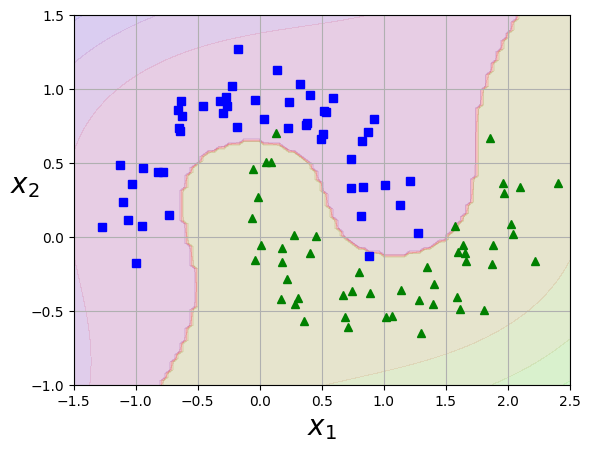

In [362]:
# linespace: function used to find a specific no. of points that r spread out equal distance between two given points.
# two given points in x0s are (axes[0], axes[1]) and in x1s are axes[2], axes[3].
# np.meshgrid: used to create a grid of coordinates from two input arrays(x0, x1).
# ravel: used to flatten a NumPy array into a 1-dimensional array.
# x0.ravel() takes the x0 array (which is a grid of x-coordinates) and converts it into a single, long list of all those x-coordinates
# x1.ravel() takes the x1 array (the grid of y-coordinates) and flattens it into a single, long list of all those y-coordinates.
# np.c_: used to concatenate (join) arrays along the second axis (column-wise).
# .reshape(x0.shape): This reshapes the 1-D array of predictions back into the original 2-D shape of your grid.
# contourf function used to create a filled contour plot
# cmap = plt.cm.brg: This sets the colormap to use for filling the contours. plt.cm.brg is a built-in colormap that transitions from blue to red to green.
# alpha = 0.1 makes the colors quite transparent for proper visualization.
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  x = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(x).reshape(x0.shape)
  y_decision = clf.decision_function(x).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
  plt.contourf(x0, x1, y_decision, cmap = plt.cm.brg, alpha = 0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [363]:
from sklearn.metrics import accuracy_score
y_pred = polynomial_svm_clf.predict(x)

accuracy = accuracy_score(y, y_pred)
accuracy

0.97